In [68]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [69]:
data = pd.read_csv("Train_dataset.csv")

In [70]:
data = data[['smart_12_normalized', 'smart_189_normalized', 'smart_190_normalized', 'smart_193_normalized',
             'smart_199_normalized', 'smart_240_normalized', 'smart_242_normalized', 'smart_5_normalized',
             'smart_187_normalized', 'smart_188_normalized', 'smart_197_normalized', 'smart_198_normalized',
             'failure_actual_fail']]

In [71]:
data.shape

(32113, 13)

In [72]:
fails = data[data['failure_actual_fail']==1]
fails.shape

(836, 13)

In [73]:
non_fails = data[data['failure_actual_fail']==0]
# Sample 836 from the non-failed hard disks
non_fails = non_fails.sample(n=fails.shape[0])
non_fails.shape

(836, 13)

In [74]:
total_data = pd.concat([fails, non_fails])

In [75]:
x = total_data.drop(columns="failure_actual_fail")
y = total_data["failure_actual_fail"]

In [76]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [77]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [78]:
logistic.score(x_test, y_test)

0.7014925373134329

In [79]:
predictions = logistic.predict(x)

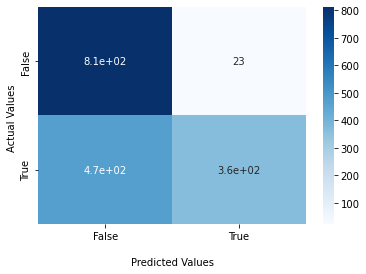

In [80]:
cf_matrix = confusion_matrix(y, predictions)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

pyplot.show()